## Exploratory Data Analysis

1. Missing values
2. Numerical Discrete Variables
3. Numerical Continuous Features
4. Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df["PRICE"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

## 1. Missing values

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

* There are no missing values

## 2. Numerical Discrete features

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  14


In [9]:
numerical_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

* All features are numerical.

In [10]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
# Let's consider as discrete feature those features who have less than 25 unique values.

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [11]:
discrete_feature

['CHAS', 'RAD']

In [12]:
df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [13]:
df["RAD"].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

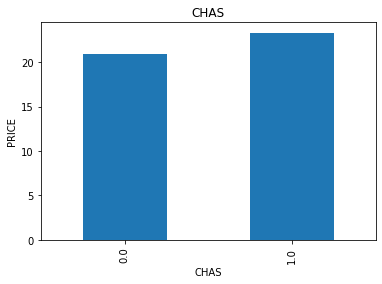

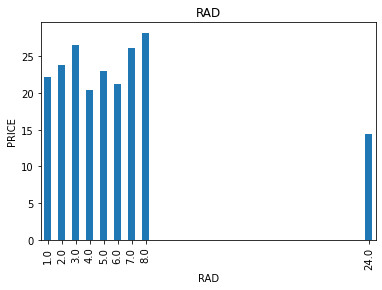

In [14]:
## Lets Find the relationship between discrete features and dependent feature (Bad_Loan)

for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['PRICE'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.show()
    
# the median is used since PRICE feature has many outliers

* There is a relationship between our discrete features and target feature.

## 3. Numerical Continuous features

In [15]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


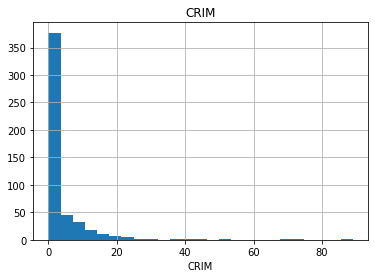

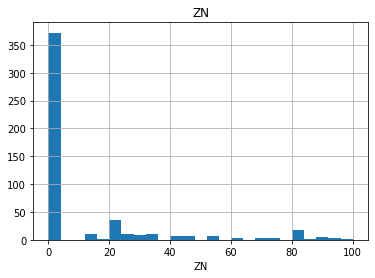

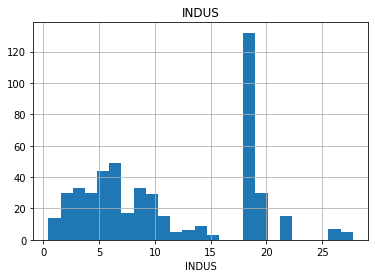

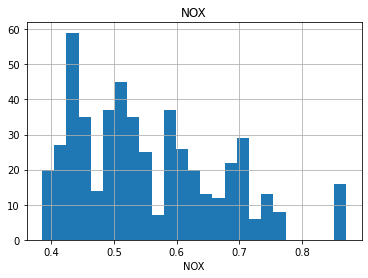

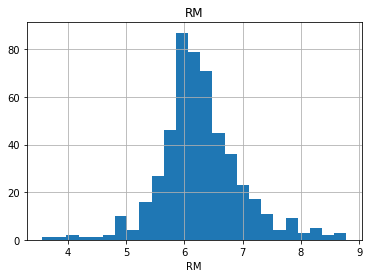

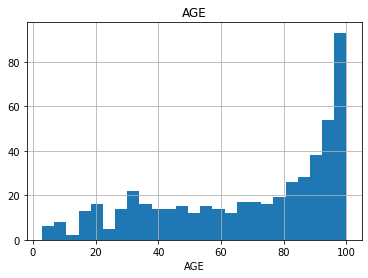

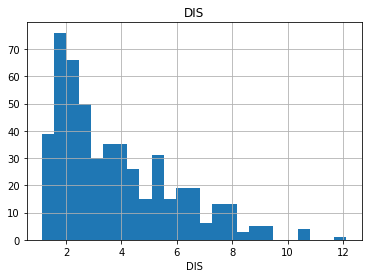

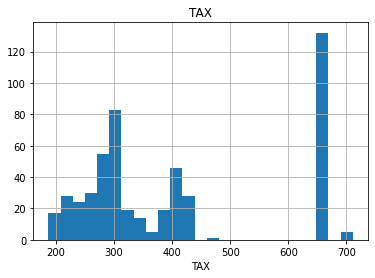

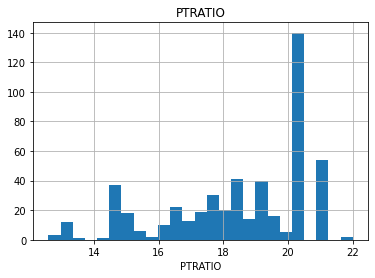

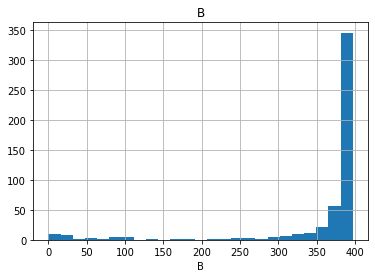

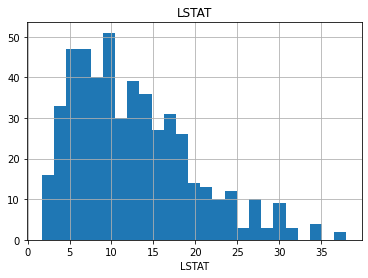

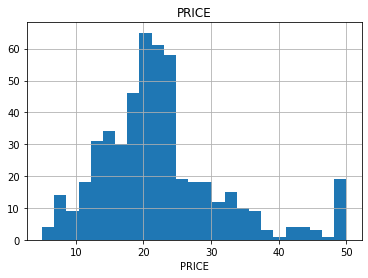

In [16]:
# Distribution of continuous features

for feature in continuous_feature:
    data=df.copy() 
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

* Distribution of features RM and PRICE is similar to Normal Distribution. All the other features have left or right skewness which we need to transform to Normal Distribution.

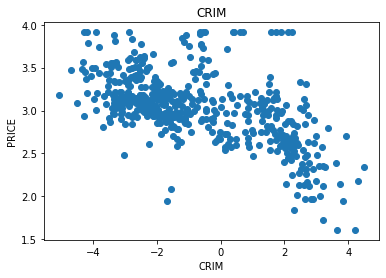

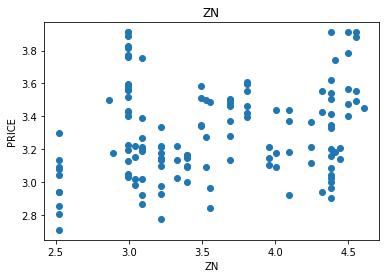

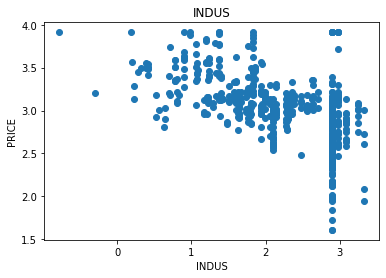

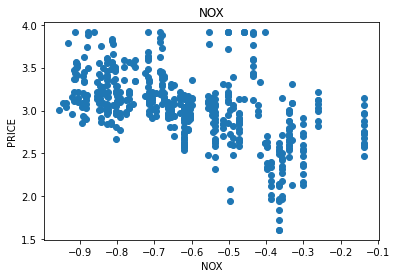

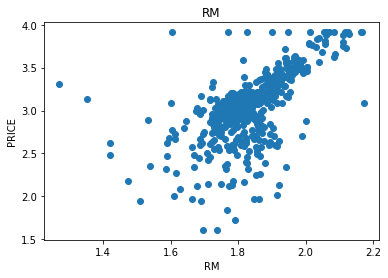

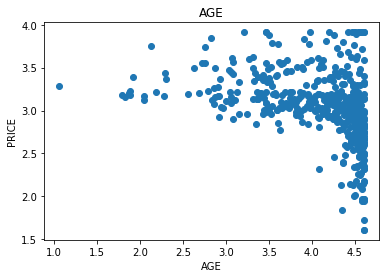

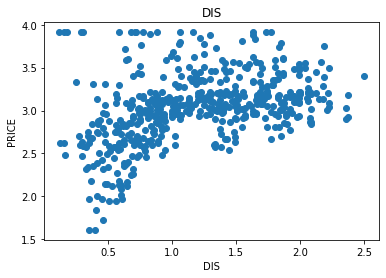

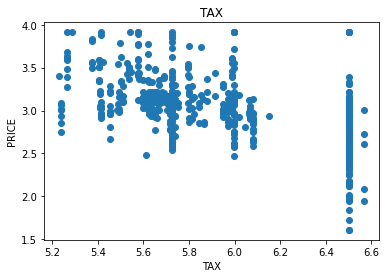

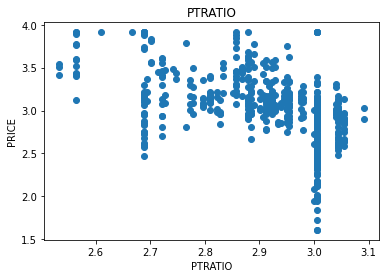

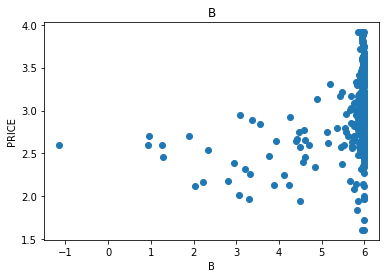

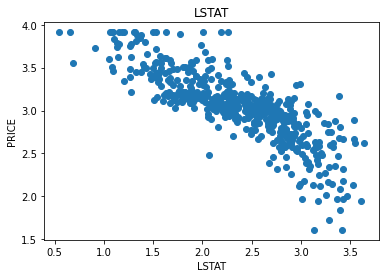

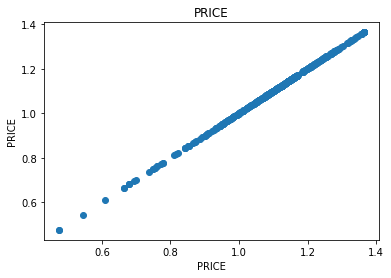

In [17]:
# We will be using logarithmic transformation to have a better visualization of data since there is a lot of skewness.
for feature in continuous_feature:
    data=df.copy()
    data[feature]=np.log(data[feature])
    data['PRICE']=np.log(data['PRICE'])
    plt.scatter(data[feature],data['PRICE'])
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.title(feature)
    plt.show()

* There are some features like LSTAT, DIS, RM, NOX, TAX, INDUS, CRIM who seem to have a linear relationship with the target feature PRICE. There are also some features like ZN, TAX, B who might not have a strong relationship with target feature PRICE.

## 4. Outliers

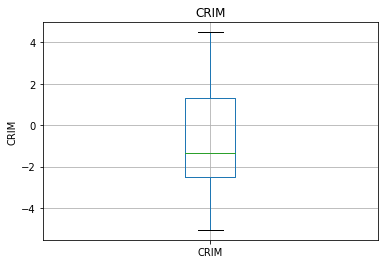

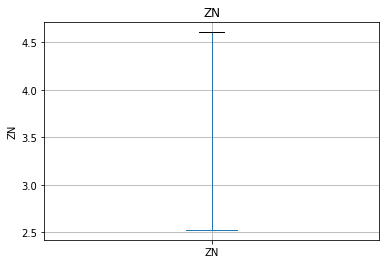

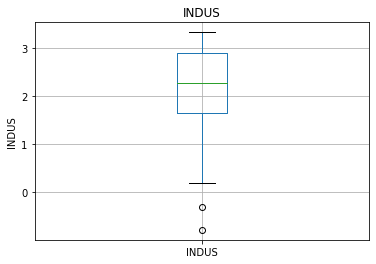

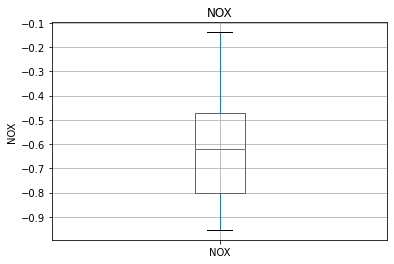

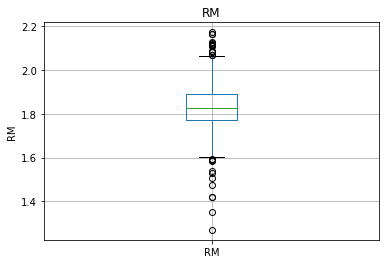

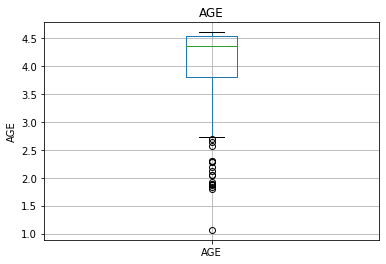

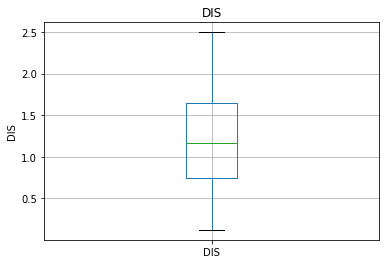

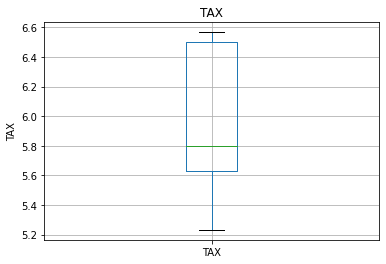

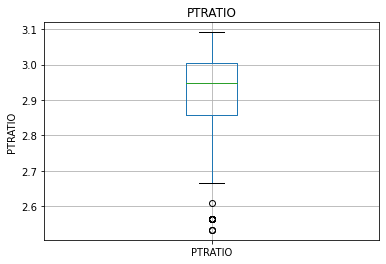

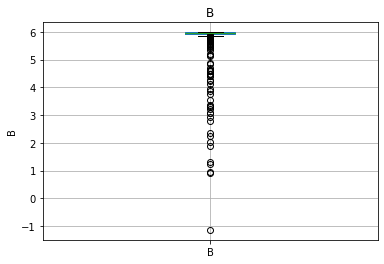

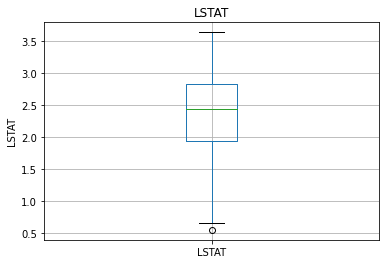

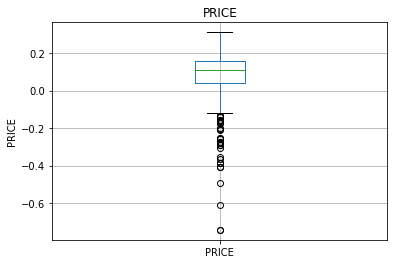

In [18]:
for feature in continuous_feature:
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

* Feature like INDUS, RM, AGE, PTRATIO, LSTAT have some outliers

## Feature Engineering

In [19]:
X = df.drop("PRICE", axis=1)
y = df["PRICE"]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
X["ZN"].value_counts() / len(X["ZN"]) * 100

0.0      73.517787
20.0      4.150198
80.0      2.964427
12.5      1.976285
25.0      1.976285
22.0      1.976285
40.0      1.383399
30.0      1.185771
45.0      1.185771
90.0      0.988142
95.0      0.790514
21.0      0.790514
60.0      0.790514
33.0      0.790514
28.0      0.592885
52.5      0.592885
75.0      0.592885
34.0      0.592885
35.0      0.592885
70.0      0.592885
55.0      0.592885
82.5      0.395257
85.0      0.395257
17.5      0.197628
100.0     0.197628
18.0      0.197628
Name: ZN, dtype: float64

* 73% of ZN column values are 0. In EDA we say that this feature does not have a relationship with target feature so we can drop this entire column

In [21]:
X.drop("ZN", axis=1, inplace=True)
X.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
continuous_feature

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

In [23]:
new_features = [feature for feature in continuous_feature if feature not in ["PRICE", "RM", "ZN"]]
new_features

['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [24]:
# Transform features that have skewness into normally distributed values using log transformation

for feature in new_features:
    X[feature]=np.log(X[feature])

In [25]:
# Transform data with mean=0 and std=1
from sklearn.preprocessing import StandardScaler

cols = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)

## Feature Selection

In [26]:
from sklearn.tree import ExtraTreeRegressor

model = ExtraTreeRegressor()
model.fit(X, y)

ExtraTreeRegressor()

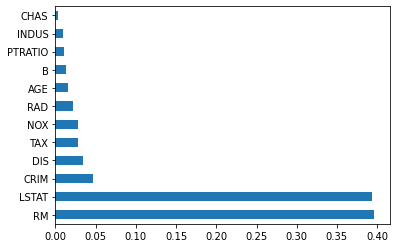

In [27]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [28]:
best_features = feat_importances.sort_values(ascending=False)[:10].index
best_features

Index(['RM', 'LSTAT', 'CRIM', 'DIS', 'TAX', 'NOX', 'RAD', 'AGE', 'B',
       'PTRATIO'],
      dtype='object')

In [29]:
X = X[best_features]
X.shape

(506, 10)

### Handle Multicolleniarity

In [30]:
# Parameter: X_train (only continuous features) and threshold
# Returns duo columns that are highly correlated

def multicoll(dataset, threshold):
    cols_remove = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix)):
            if i!=j and abs(corr_matrix.iloc[i,j]) > threshold:
                cols_remove.append([corr_matrix.columns[i], corr_matrix.columns[j]])
                
    return cols_remove

In [31]:
# Parameter: cols that are returned from multicall function
# Returns cleaned cols (removes duplicated elements)

def clean(cols):
    n = len(cols)
    i = 0
    while i < n:
        li = cols[i]
        j = 0
        while j < n:
            new_li = cols[j]
            if i!=j and li[0] == new_li[1] and li[1] == new_li[0]:
                cols.remove(new_li)
                n = n-1
            
            j = j+1
        i = i+1
                
    return cols

In [32]:
# Select independent features that have the correlation coefficient higher than 0.8
cols = multicoll(X, 0.85)
cols_corr = clean(cols)
print(cols_corr)

[['CRIM', 'RAD'], ['DIS', 'NOX'], ['TAX', 'RAD']]


* Some features are highly correlated with each other but since we have few features i am not going to drop them.

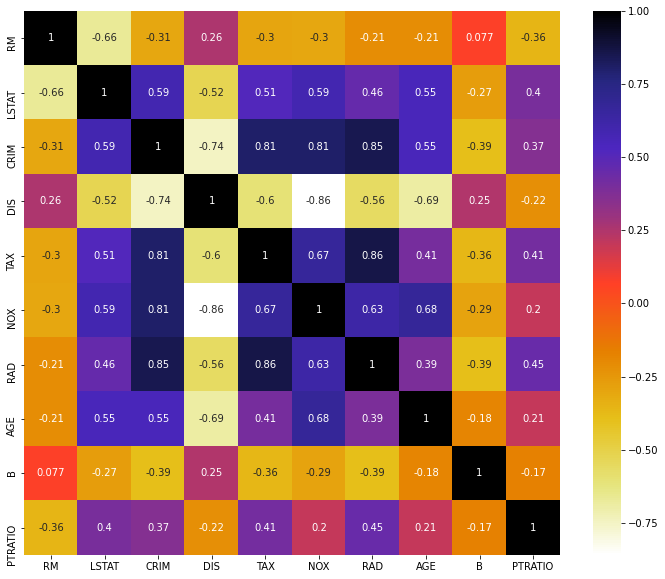

In [33]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=3)

In [35]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
# Model performance in TEST SET

print("R Squared in TRAINING SET: ", reg.score(x_test, y_test))

pred_test = reg.predict(x_test)
print("Adjusted R Squared in TRAINING SET: ", r2_score(y_test, pred_test))

R Squared in TRAINING SET:  0.8653469096022167
Adjusted R Squared in TRAINING SET:  0.8653469096022167


In [37]:
# Model performance in TRAINING SET

print("R Squared in TRAINING SET: ", reg.score(x_train, y_train))

pred_train = reg.predict(x_train)
print("Adjusted R Squared in TRAINING SET: ", r2_score(y_train, pred_train))

R Squared in TRAINING SET:  0.7691852586672425
Adjusted R Squared in TRAINING SET:  0.7691852586672425


In [38]:
import pickle

file = open("lr.pickle", "wb")
pickle.dump(reg, file)

In [39]:
f1 = open('scaler.sav', 'wb')
pickle.dump(scaler, f1)